In [116]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize, basinhopping
from itertools import product
from numpy.linalg import cholesky
from tqdm import tqdm
import plotly.graph_objects as go
import funciones_optim
from importlib import reload
reload(funciones_optim)
from mystuff import bdh

from funciones_optim import port_ret,sumauno,var,r_gen,min_vol, normi, prat,_data

#arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error

#aNN
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


In [29]:
data_ = _data()
data_.prat.tail()
data_.set_labels(5)

label,USTTEN,USDCOP,SPX,EEM,XAU
date,,,,,
2011-01-03,1.0,0.0,1.0,0.0,0.0
2011-01-04,1.0,0.0,1.0,0.0,1.0
2011-01-05,0.0,0.0,1.0,0.0,0.0
2011-01-06,0.0,1.0,1.0,1.0,0.0
2011-01-07,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
2023-10-12,1.0,0.0,0.0,0.0,1.0
2023-10-13,1.0,1.0,0.0,0.0,1.0
2023-10-17,0.0,1.0,0.0,0.0,1.0


<Axes: xlabel='date'>

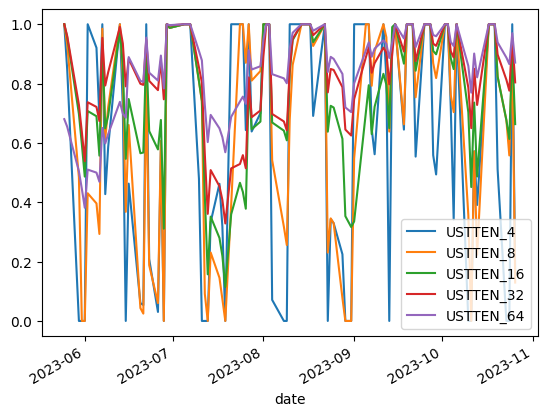

In [123]:
data_.prat.iloc[-100:,:5].plot()

In [133]:
class ann:
    def __init__(self,label):
        xy = data_.prat.merge(data_.ylabels,how='inner',left_index=True, right_index=True)
        x = xy.loc[:,data_.prat.columns].astype(float)
        y = xy.loc[:,data_.ylabels.columns].astype(int)
        xtrain = x.loc[:'2022',:].to_numpy()
        ytrain = y.loc[:'2022',label].to_numpy().reshape(-1,1)

        self.xtrain = xtrain
        self.ytrain = ytrain

    def modelfit(self,epochs):
        model = Sequential([
            Dense(32,input_shape=(25,),activation='relu'),
            Dropout(0.1),
            # Dense(32,activation='relu'),
            # Dense(16,activation='relu'),
            Dense(2,activation='softmax')
        ])

        model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
        model.fit(x=self.xtrain,y=self.ytrain,batch_size=20,epochs=epochs,validation_split=0.1,shuffle=True,verbose=2)
        self.model = model


In [134]:
ann1 = ann('USDCOP')
ann1.modelfit(30)

Epoch 1/30
125/125 - 2s - loss: 0.7466 - accuracy: 0.5104 - val_loss: 0.7134 - val_accuracy: 0.5216 - 2s/epoch - 14ms/step
Epoch 2/30
125/125 - 0s - loss: 0.7286 - accuracy: 0.5024 - val_loss: 0.7089 - val_accuracy: 0.5144 - 408ms/epoch - 3ms/step
Epoch 3/30
125/125 - 1s - loss: 0.7179 - accuracy: 0.5056 - val_loss: 0.7064 - val_accuracy: 0.5396 - 577ms/epoch - 5ms/step
Epoch 4/30
125/125 - 0s - loss: 0.7090 - accuracy: 0.5072 - val_loss: 0.7045 - val_accuracy: 0.5396 - 436ms/epoch - 3ms/step
Epoch 5/30
125/125 - 0s - loss: 0.7039 - accuracy: 0.5148 - val_loss: 0.7029 - val_accuracy: 0.5216 - 415ms/epoch - 3ms/step
Epoch 6/30
125/125 - 0s - loss: 0.6991 - accuracy: 0.5212 - val_loss: 0.7020 - val_accuracy: 0.5144 - 400ms/epoch - 3ms/step
Epoch 7/30
125/125 - 0s - loss: 0.6952 - accuracy: 0.5328 - val_loss: 0.7015 - val_accuracy: 0.5036 - 413ms/epoch - 3ms/step
Epoch 8/30
125/125 - 0s - loss: 0.6952 - accuracy: 0.5264 - val_loss: 0.7011 - val_accuracy: 0.5108 - 400ms/epoch - 3ms/step
Ep

In [136]:
ann1.model.weights

[<tf.Variable 'dense_87/kernel:0' shape=(25, 32) dtype=float32, numpy=
 array([[ 0.25913534,  0.29120332,  0.23088706, -0.2729903 , -0.21023043,
          0.23088475, -0.1926547 ,  0.19611593,  0.10848926,  0.0131436 ,
          0.1424155 ,  0.14517058, -0.11798646, -0.20624252,  0.26226407,
          0.02982156, -0.20443623, -0.03873687,  0.13085045, -0.24695969,
          0.05687279, -0.16305235,  0.14442138, -0.02984839,  0.32526577,
          0.30488732, -0.00291933,  0.20694724, -0.2741859 , -0.24231988,
         -0.30274087, -0.15089202],
        [ 0.1262064 ,  0.3230121 ,  0.16277376,  0.07552551, -0.17758836,
          0.31064597, -0.12540585, -0.12127914,  0.31208226,  0.23187771,
         -0.03033729,  0.02922283, -0.26874378, -0.2374151 , -0.19879422,
          0.27437812,  0.17784728,  0.18964894,  0.10762378,  0.04059858,
          0.0868706 ,  0.06050447,  0.12564203, -0.25313312, -0.11335835,
          0.11687438,  0.08704405, -0.22798331, -0.2988609 ,  0.19203842,
     

USTTEN
1.3732531149729896


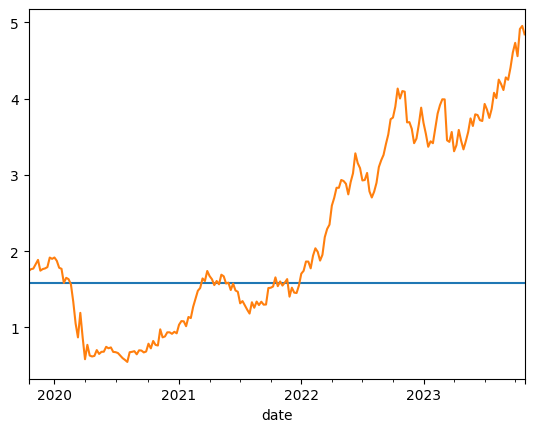

USDCOP
349.1308376139333


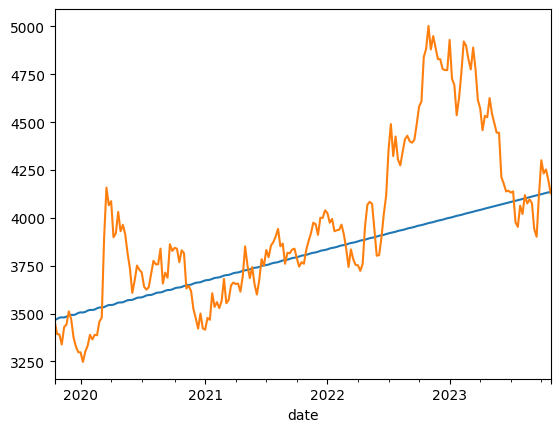

SPX
654.9934033607084


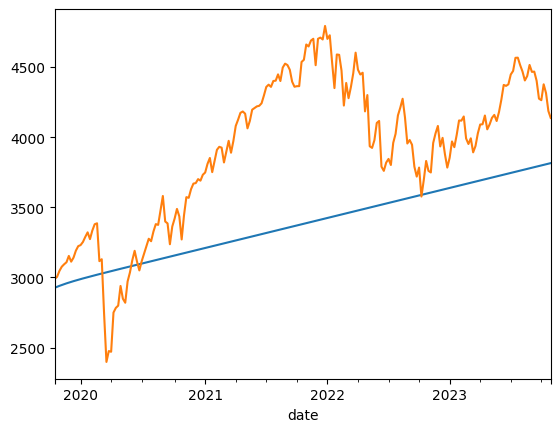

EEM
7.127959795695864


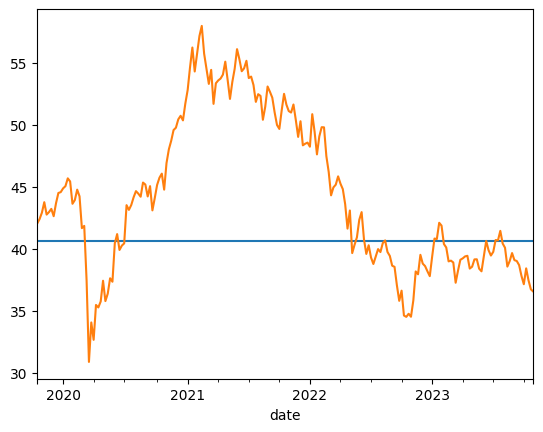

XAU
325.2937842964215


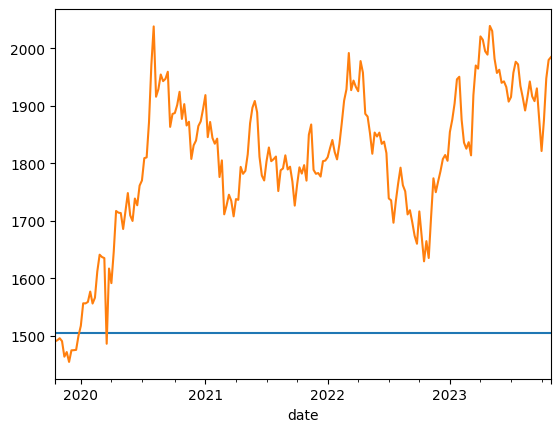

In [40]:
_, ti = TimeSeriesSplit(n_splits=2).split(rt_)
x_train =rt_.iloc[ti[0],:]
x_test = rt_.iloc[ti[1],:]
for c in x_train.columns[:]:
    modl = auto_arima(x_train[c])
    preds = modl.predict(n_periods=len(x_test[c]))
    rmse = np.sqrt(mean_squared_error(x_test[c],preds))
    print(c)
    print(rmse)
    preds.plot()
    x_test[c].plot()
    plt.show()

In [2]:
data = pd.read_csv('series_tiempo.csv',index_col='FECHA')
data.index= pd.to_datetime(data.index,format='%d/%m/%Y')
data.sort_index(inplace=True)
data = data.dropna(axis=0).drop(['CASH'],axis=1)

vol = data.mul(np.sqrt(12)).std()
cor = data.corr()
cov = cor*np.outer(vol,vol)
ret = pd.Series({k:v for k,v in zip(vol.index,[8.8,9,13])})

In [13]:
perfiles = 10  #Perfiles
num_simu = 100  #numero de simulaciones
w = np.array([ 1/len(vol) for i in range(len(vol))])
bounds = [(0,1) for i in range(len(vol))]
minv = min_vol(bounds,cov,w)
maxv = np.max(vol)
target_vol = np.linspace(minv,maxv,num=perfiles)
R = r_gen(num_simu,ret,cor,vol)

opt_ports = {}
for tv in tqdm(target_vol):
    ws_ =[]
    for ri in R:
        constraints = [{'type':'eq','fun':var,'args':(cov,tv)},{'type':'eq','fun':sumauno}]
        result = minimize(port_ret,w,args=(ri),bounds=bounds,constraints=constraints)
        if result.success:
            ws_.append(result.x)
        
    opt_ports[np.round(tv*100,2)] = pd.Series(ws_).mean(axis=0).round(4)
df = pd.DataFrame(opt_ports,index=ret.index).transpose()
df['Return'] = df.apply(port_ret,args=[ret],axis=1).mul(-1).round(3)
df.index.name = 'Volatility'

100%|██████████| 10/10 [00:06<00:00,  1.44it/s]


In [16]:
traces=[]
traces.append(go.Scatter(x=df.index,y=df.Return,mode='lines+markers',line={'width':1,'color':'black'},marker={'size':5,'color':'blue'}))
layout = go.Layout(title={'text':'Frontera Eficiente','font':{'size':15}},width=500,height=400,
                   margin={'t':50,'l':20,'r':20,'b':20},template='simple_white',
                   xaxis={'title':{'text':'xVolatility','font':{'size':12}}},
                   yaxis={'title':{'text':'xReturn','font':{'size':12}}})
fig = go.Figure(traces,layout)
fig.show()

